In [1]:
import sys

robot_packages = "/opt/openrobots/lib/python3.7/site-packages/"
if robot_packages not in sys.path:
    sys.path.insert(0, "/opt/openrobots/lib/python3.7/site-packages/")
else:
    print('robot_packages already in sys.path')

iter     cost         stop         grad         xreg         ureg       step    ||ffeas||
   0  1.22697e-01  2.76233e-04  -7.71915e+00  1.00000e-09  1.00000e-09  0.2500  3.14000e+00
   1  1.08597e-01  1.54945e-04  9.40559e-02  1.00000e-09  1.00000e-09  0.1250  2.35500e+00
   2  9.60112e-02  1.08567e-04  6.84134e-02  1.00000e-09  1.00000e-09  0.2500  2.06062e+00
   3  9.18624e-02  6.78398e-05  1.02818e-02  1.00000e-09  1.00000e-09  0.1250  1.54547e+00
   4  9.02070e-02  3.53505e-05  -5.12656e-03  1.00000e-09  1.00000e-09  0.2500  1.35229e+00
   5  8.20668e-02  3.07220e-05  2.75462e-02  1.00000e-09  1.00000e-09  0.2500  1.01421e+00
   6  7.62760e-02  2.49693e-05  4.33569e-02  1.00000e-09  1.00000e-09  0.2500  7.60660e-01
   7  7.23222e-02  5.69504e-05  3.43053e-02  1.00000e-09  1.00000e-09  0.2500  5.70495e-01
   8  7.15699e-02  3.90599e-05  2.51671e-02  1.00000e-09  1.00000e-09  0.2500  4.27871e-01
   9  6.65302e-02  2.93792e-05  1.60147e-02  1.00000e-09  1.00000e-09  0.2500  3.20904e-0

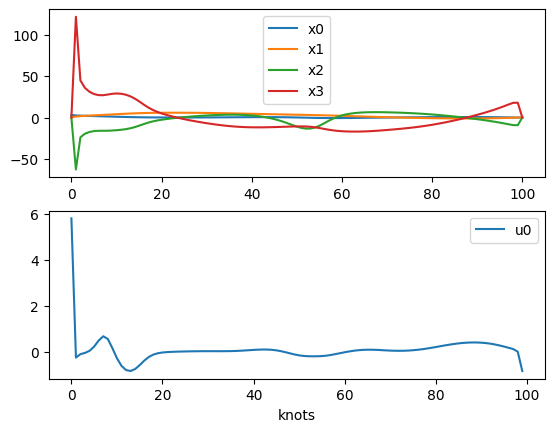

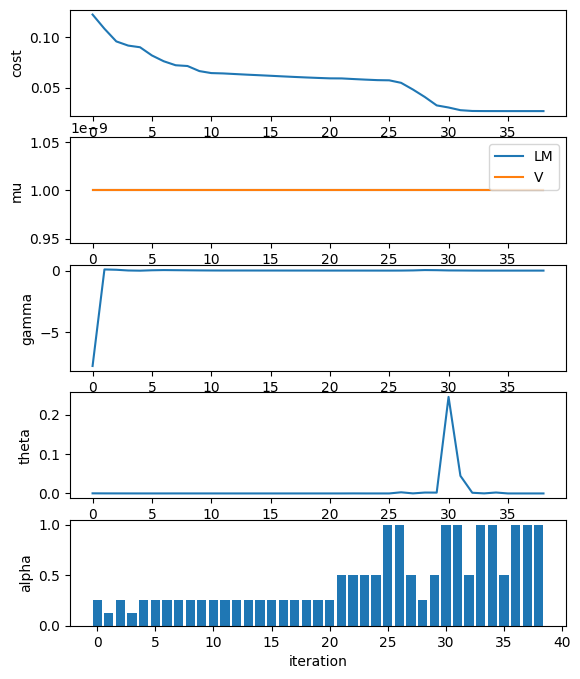

In [3]:
import os
import sys

import crocoddyl
import numpy as np
import example_robot_data
from crocoddyl.utils.pendulum import CostModelDoublePendulum, ActuationModelDoublePendulum
os.environ['CROCODDYL_PLOT'] = 'True'

WITHDISPLAY = 'display' in sys.argv or 'CROCODDYL_DISPLAY' in os.environ
WITHPLOT = 'plot' in sys.argv or 'CROCODDYL_PLOT' in os.environ

# Loading the double pendulum model
pendulum = example_robot_data.load('double_pendulum')
model = pendulum.model

state = crocoddyl.StateMultibody(model)
actuation = ActuationModelDoublePendulum(state, actLink=1)

nu = actuation.nu
runningCostModel = crocoddyl.CostModelSum(state, nu)
terminalCostModel = crocoddyl.CostModelSum(state, nu)

xResidual = crocoddyl.ResidualModelState(state, state.zero(), nu)
xActivation = crocoddyl.ActivationModelQuad(state.ndx)
uResidual = crocoddyl.ResidualModelControl(state, nu)
xRegCost = crocoddyl.CostModelResidual(state, xActivation, xResidual)
uRegCost = crocoddyl.CostModelResidual(state, uResidual)
xPendCost = CostModelDoublePendulum(state, crocoddyl.ActivationModelWeightedQuad(np.array([1.] * 4 + [0.1] * 2)), nu)

dt = 1e-2

runningCostModel.addCost("uReg", uRegCost, 1e-4 / dt)
runningCostModel.addCost("xGoal", xPendCost, 1e-5 / dt)
terminalCostModel.addCost("xGoal", xPendCost, 100.)

runningModel = crocoddyl.IntegratedActionModelEuler(
    crocoddyl.DifferentialActionModelFreeFwdDynamics(state, actuation, runningCostModel), dt)
terminalModel = crocoddyl.IntegratedActionModelEuler(
    crocoddyl.DifferentialActionModelFreeFwdDynamics(state, actuation, terminalCostModel), dt)

# Creating the shooting problem and the FDDP solver
T = 100
x0 = np.array([3.14, 0., 0., 0.])
problem = crocoddyl.ShootingProblem(x0, [runningModel] * T, terminalModel)
solver = crocoddyl.SolverFDDP(problem)

cameraTF = [1.4, 0., 0.2, 0.5, 0.5, 0.5, 0.5]
if WITHDISPLAY and WITHPLOT:
    display = crocoddyl.GepettoDisplay(pendulum, 4, 4, cameraTF, False)
    solver.setCallbacks([crocoddyl.CallbackLogger(), crocoddyl.CallbackVerbose(), crocoddyl.CallbackDisplay(display)])
elif WITHDISPLAY:
    display = crocoddyl.GepettoDisplay(pendulum, 4, 4, cameraTF, False)
    solver.setCallbacks([crocoddyl.CallbackVerbose(), crocoddyl.CallbackDisplay(display)])
elif WITHPLOT:
    solver.setCallbacks([crocoddyl.CallbackLogger(), crocoddyl.CallbackVerbose()])
else:
    solver.setCallbacks([crocoddyl.CallbackVerbose()])

# Solving the problem with the FDDP solver
solver.solve()

# Plotting the entireimport os
import sys

import crocoddyl
import numpy as np
import example_robot_data
from crocoddyl.utils.pendulum import CostModelDoublePendulum, ActuationModelDoublePendulum
os.environ['CROCODDYL_PLOT'] = 'True'

WITHDISPLAY = 'display' in sys.argv or 'CROCODDYL_DISPLAY' in os.environ
WITHPLOT = 'plot' in sys.argv or 'CROCODDYL_PLOT' in os.environ

# Loading the double pendulum model
pendulum = example_robot_data.load('double_pendulum')
model = pendulum.model

state = crocoddyl.StateMultibody(model)
actuation = ActuationModelDoublePendulum(state, actLink=1)

nu = actuation.nu
runningCostModel = crocoddyl.CostModelSum(state, nu)
terminalCostModel = crocoddyl.CostModelSum(state, nu)

xResidual = crocoddyl.ResidualModelState(state, state.zero(), nu)
xActivation = crocoddyl.ActivationModelQuad(state.ndx)
uResidual = crocoddyl.ResidualModelControl(state, nu)
xRegCost = crocoddyl.CostModelResidual(state, xActivation, xResidual)
uRegCost = crocoddyl.CostModelResidual(state, uResidual)
xPendCost = CostModelDoublePendulum(state, crocoddyl.ActivationModelWeightedQuad(np.array([1.] * 4 + [0.1] * 2)), nu)

dt = 1e-2

runningCostModel.addCost("uReg", uRegCost, 1e-4 / dt)
runningCostModel.addCost("xGoal", xPendCost, 1e-5 / dt)
terminalCostModel.addCost("xGoal", xPendCost, 100.)

runningModel = crocoddyl.IntegratedActionModelEuler(
    crocoddyl.DifferentialActionModelFreeFwdDynamics(state, actuation, runningCostModel), dt)
terminalModel = crocoddyl.IntegratedActionModelEuler(
    crocoddyl.DifferentialActionModelFreeFwdDynamics(state, actuation, terminalCostModel), dt)

# Creating the shooting problem and the FDDP solver
T = 100
x0 = np.array([3.14, 0., 0., 0.])
problem = crocoddyl.ShootingProblem(x0, [runningModel] * T, terminalModel)
solver = crocoddyl.SolverFDDP(problem)

cameraTF = [1.4, 0., 0.2, 0.5, 0.5, 0.5, 0.5]
if WITHDISPLAY and WITHPLOT:
    display = crocoddyl.GepettoDisplay(pendulum, 4, 4, cameraTF, False)
    solver.setCallbacks([crocoddyl.CallbackLogger(), crocoddyl.CallbackVerbose(), crocoddyl.CallbackDisplay(display)])
elif WITHDISPLAY:
    display = crocoddyl.GepettoDisplay(pendulum, 4, 4, cameraTF, False)
    solver.setCallbacks([crocoddyl.CallbackVerbose(), crocoddyl.CallbackDisplay(display)])
elif WITHPLOT:
    solver.setCallbacks([crocoddyl.CallbackLogger(), crocoddyl.CallbackVerbose()])
else:
    solver.setCallbacks([crocoddyl.CallbackVerbose()])

# Solving the problem with the
 motion
if WITHPLOT:
    log = solver.getCallbacks()[0]
    crocoddyl.plotOCSolution(log.xs, log.us, figIndex=1, show=False)
    crocoddyl.plotConvergence(log.costs, log.u_regs, log.x_regs, log.grads, log.stops, log.steps, figIndex=2)

# Display the entire motion
if WITHDISPLAY:
    display = crocoddyl.GepettoDisplay(pendulum, floor=False)
    display.displayFromSolver(solver)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e97f5260-ac78-47b0-aacb-dae2354eef36' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>